# Creation of all the networks

The content of this notebook describes the adquisition of a network model from the Band Power Times Series (BPTs) on EEG  data.
The network was created using Grangers Causality to model de a bidrectional influence from each signal to others in the net.

In [22]:
import numpy as np
import iberoSignalPro.preprocesa as ib
import matplotlib.pyplot as plt
import mne
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import seaborn as sns

from ntwktools import *

# Network Generation for a single subject

on the ntwktools.py are the objects and some of the functions

In [23]:
x,y,_,_,ch_names = ib.eloc_reader('../codigo/eloc16_bueno.txt')
ch_types = ["eeg"] * 16
info = mne.create_info(list(ch_names),sfreq=10,ch_types=ch_types)
info.set_montage('standard_1020')
fs = 10

In [25]:
filename = r"c:\Users\yomerengues\afolder\SanchoPanza\S1\pasivoPost.csv"

df = pd.read_csv(filename)
df.head()

HRV        RRV   EnvAnta    EnvAgo       Torque     Posicion  \
0  89.762188  25.229183  0.025614  0.028800 -2562.465424  8404.840519   
1  85.367561  25.612670  0.038248  0.024402 -2617.528548  8454.888888   
2  81.840418  25.974989  0.038805  0.022592 -2613.134229  8457.373183   
3  79.089563  26.316718  0.035569  0.024976 -2617.185968  8457.697600   
4  77.023802  26.638434  0.041578  0.027020 -2612.805255  8457.569179   

   Binaria  alfa_FC3    mu_FC3  beta_FC3  ...   beta_O1  gamma_O1   alfa_Oz  \
0      1.0  0.029093  0.077745  0.101204  ...  0.252417  0.160240  0.085752   
1      1.0  0.022355  0.049768  0.074313  ...  0.236289  0.167189  0.078883   
2      1.0  0.020205  0.040085  0.067478  ...  0.215746  0.154952  0.085445   
3      1.0  0.020572  0.042216  0.077679  ...  0.221030  0.144635  0.093962   
4      1.0  0.018721  0.051904  0.103467  ...  0.227834  0.137223  0.090855   

      mu_Oz   beta_Oz  gamma_Oz   alfa_O2     mu_O2   beta_O2  gamma_O2  
0  0.193898  0.330573  0.120749  0.056440  0.122391  0.166713  0.058883  
1  0.147656  0.246890  0.095810  0.082551  0.125272  0.167587  0.064298  
2  0.102014  0.168717  0.075873  0.102519  0.097816  0.140954  0.056833  
3  0.077105  0.142320  0.070904  0.105462  0.071110  0.122674  0.048152  
4  0.064649  0.147512  0.074153  0.092199  0.055715  0.120991  0.045291  

[5 rows x 71 columns]

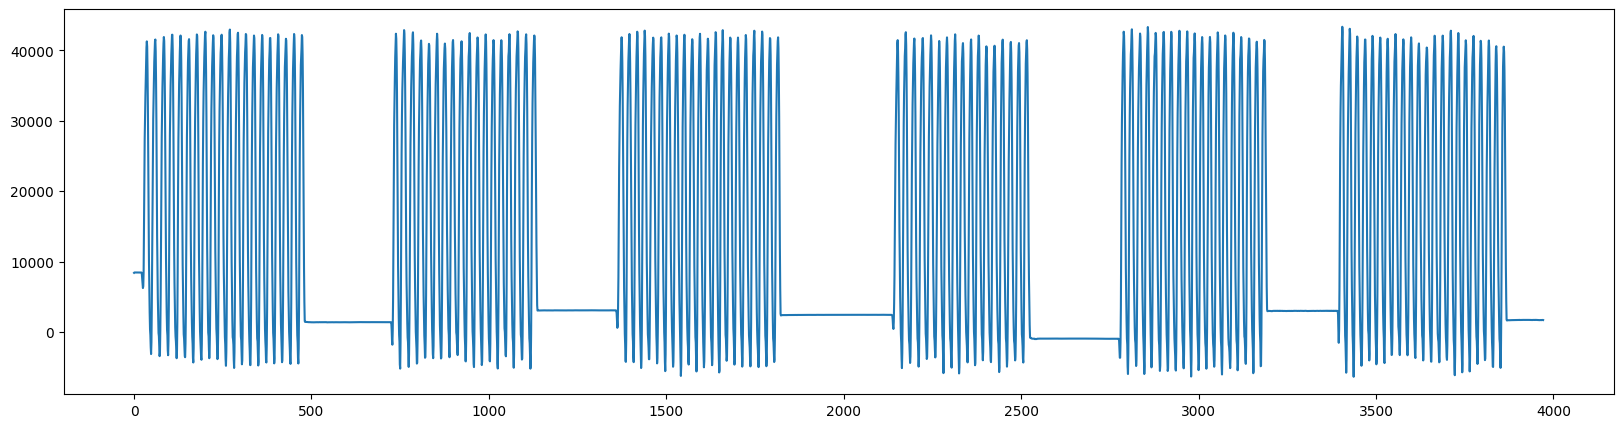

In [26]:
plt.figure(figsize=(20, 5))
plt.plot(df['Posicion'])
plt.show()

In [27]:
t = np.arange(0, len(df)/fs, 1/fs)

In [28]:

var = df.iloc[:,0:6].drop(columns=["Torque"])

alfa = pd.concat([var, df.iloc[:,7::4]], axis=1)
mu = pd.concat([var, df.iloc[:,8::4]], axis=1)
beta = pd.concat([var, df.iloc[:,9::4]], axis=1)
gamma = pd.concat([var, df.iloc[:,10::4]], axis=1)


(3972,)


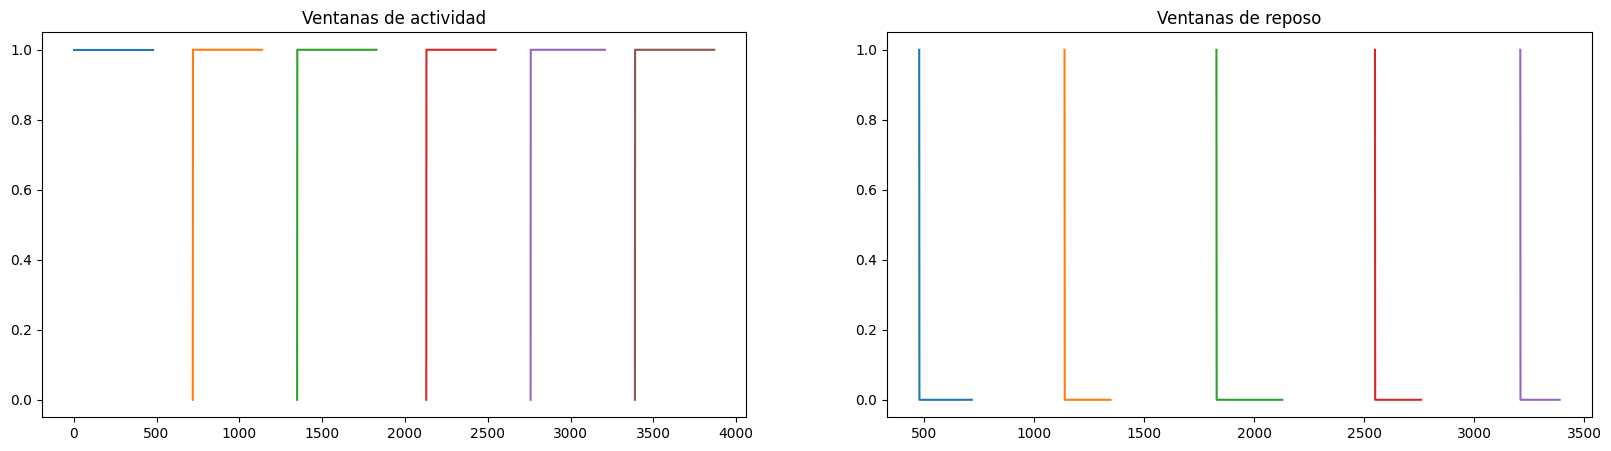

In [29]:
ventanas_actividad, ventanas_reposo = obtener_win(df["Binaria"], df["Binaria"])


In [30]:
ch_names = mu.columns.values
for i, names in enumerate(ch_names):
    if "_" in names:
        ch_names[i] = names.split("_")[1] 

In [31]:
ch_names

array(['HRV', 'RRV', 'EnvAnta', 'EnvAgo', 'Posicion', 'FC3', 'FCz', 'FC4',
       'CP3', 'C3', 'C1', 'Cz', 'C2', 'C4', 'CP4', 'P3', 'Pz', 'P4', 'O1',
       'Oz', 'O2'], dtype=object)

In [32]:
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import contextlib
import os


In [33]:
mu_ntwk = Network(mu, df["Binaria"], fs=fs, ch_names=ch_names, band = "mu")

In [34]:
mu_ntwk.get_ntwks(mu, df["Binaria"])

(3972,)
****************************
164 315
(151, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
854 1004
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
1514 1664
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2264 2414
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2909 3059
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
3554 3704
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
524 674
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
1169 1319
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
1904 2054
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2579 2729
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
3224 3374
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

(array([[[0., 1., 0., ..., 1., 1., 0.],
         [1., 0., 0., ..., 1., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 1., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 0., ..., 1., 0., 0.]],
 
        [[0., 1., 1., ..., 0., 0., 1.],
         [1., 0., 0., ..., 1., 0., 1.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 1., 1.],
         [0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 0., ..., 1., 0., 0.]],
 
        [[0., 1., 1., ..., 1., 0., 0.],
         [1., 0., 0., ..., 0., 1., 1.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 1., 0., ..., 0., 0., 0.],
         [0., 1., 0., ..., 0., 0., 0.],
         [0., 1., 0., ..., 0., 0., 0.]],
 
        [[0., 1., 1., ..., 0., 1., 0.],
         [1., 0., 0., ..., 1., 1., 1.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 1., 0.],
         [0., 0., 0., ..., 1., 0., 1.],
         [0., 0

In [19]:
mu_ntwk = Network(mu, df["Binaria"], fs=fs, ch_names=ch_names, band = "mu")
mu_ntwk.get_ntwks(mu, df["Binaria"]);

beta_ntwk = Network(beta, df["Binaria"], fs=fs, ch_names=ch_names, band="beta")
beta_ntwk.get_ntwks(beta, df["Binaria"]);

gamma_ntwk = Network(gamma, df["Binaria"], fs=fs, ch_names=ch_names, band="gamma")
gamma_ntwk.get_ntwks(gamma, df["Binaria"]);

registro = Registro(fs=10)
  

  
registro.add_network("mu", mu_ntwk, "mu")
registro.add_network("beta", beta_ntwk, "beta")
registro.add_network("gamma", gamma_ntwk, "gamma")


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

(3343,)
****************************
449 599
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
1109 1259
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
1754 1904
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2369 2519
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2999 3149
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
74 225
(151, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
779 929
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
1439 1589
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2054 2204
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2684 2834
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

(3343,)
****************************
449 599
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
1109 1259
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
1754 1904
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2369 2519
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2999 3149
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
74 225
(151, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
779 929
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
1439 1589
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2054 2204
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2684 2834
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

(3343,)
****************************
449 599
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
1109 1259
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
1754 1904
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2369 2519
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2999 3149
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
74 225
(151, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
779 929
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
1439 1589
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2054 2204
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

****************************
2684 2834
(150, 21)
****************************


c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\fercy\miniconda3\envs\ibero\Lib\site-packages\statsmodels\tsa\stat

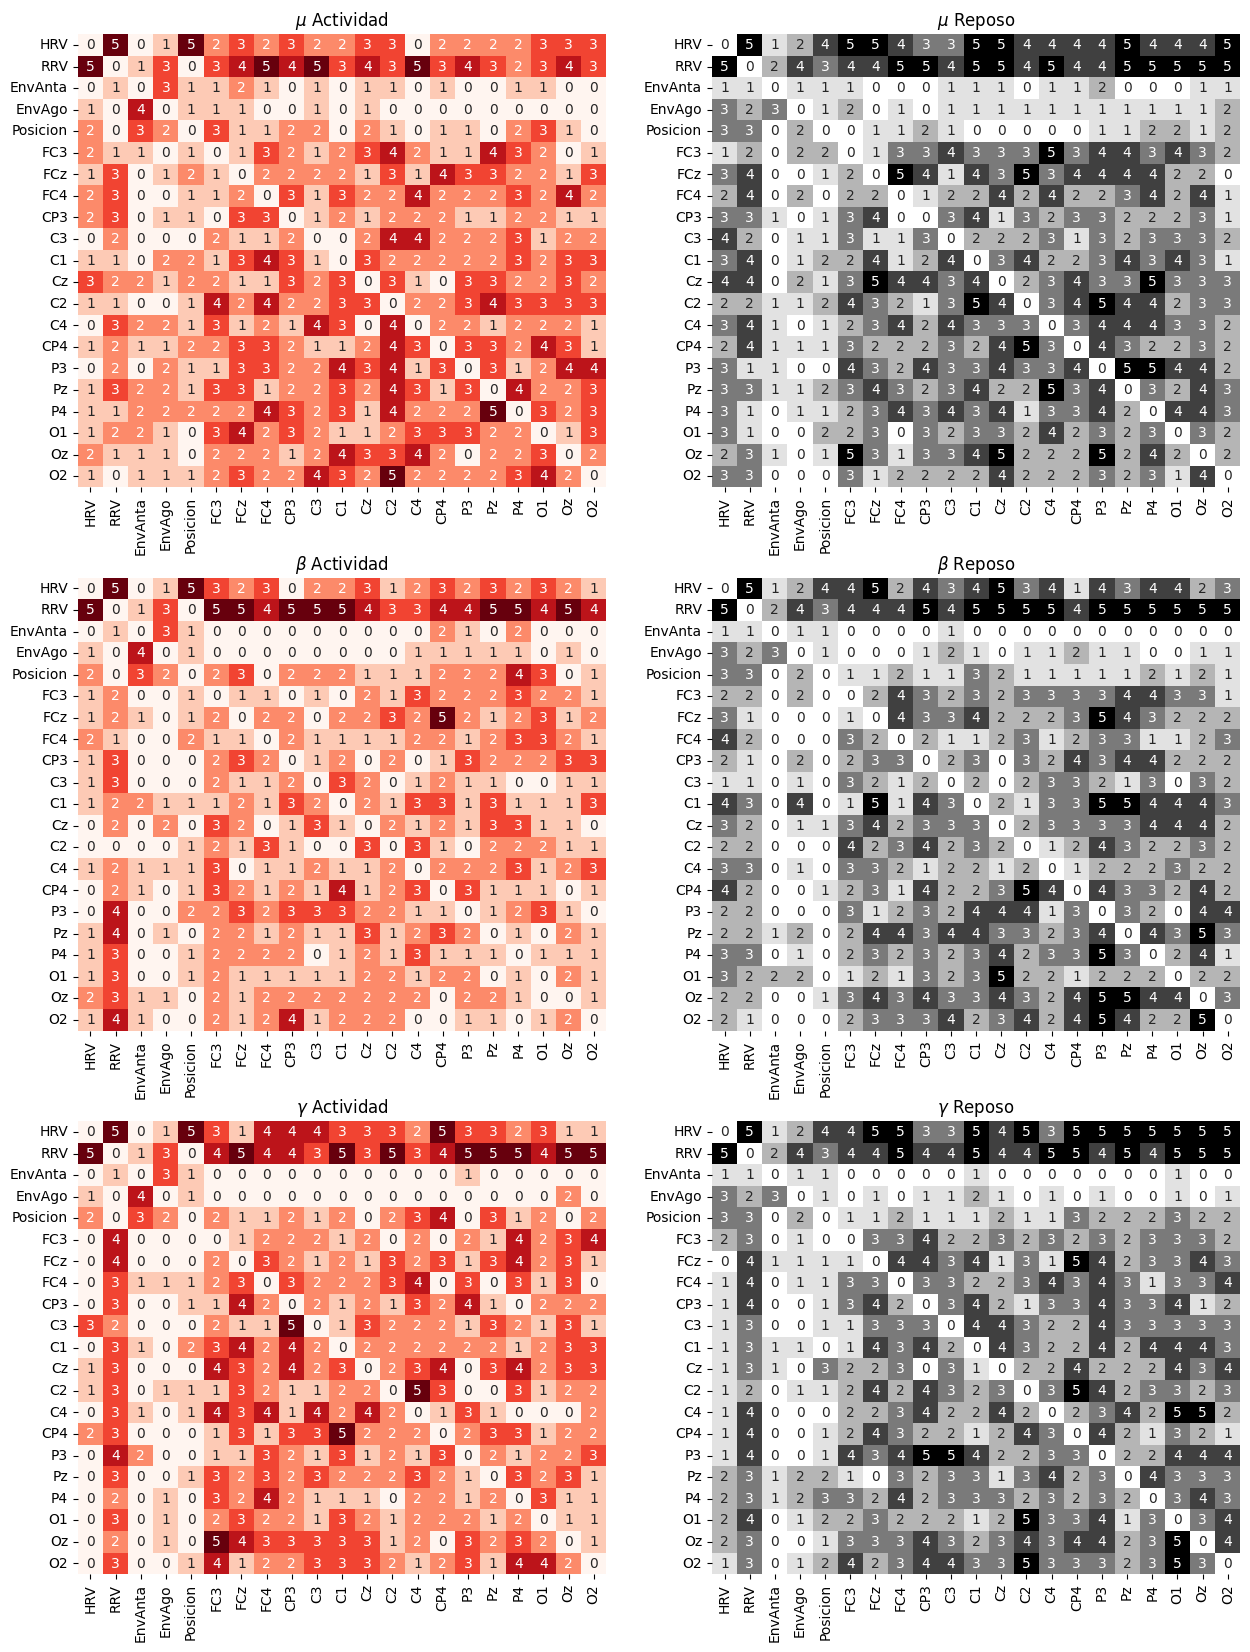

In [ ]:
plt.figure(figsize=(15, 20))
plt.subplot(3, 2, 1)

sns.heatmap(mu_ntwk.matriz_act, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names)
plt.title(r'$\mu$ Actividad')
plt.subplot(3, 2, 2)
sns.heatmap(mu_ntwk.matriz_rep, cmap='Grays', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names)

plt.title(r'$\mu$ Reposo')

plt.subplot(3, 2, 3)
sns.heatmap(beta_ntwk.matriz_act, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names)

plt.title(r'$\beta$ Actividad')


plt.subplot(3, 2, 4)
sns.heatmap(beta_ntwk.matriz_rep, cmap='Grays', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names)
plt.title(r'$\beta$ Reposo')



plt.subplot(3, 2, 5)
sns.heatmap(gamma_ntwk.matriz_act, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names)
plt.title(r'$\gamma$ Actividad')

plt.subplot(3, 2, 6)
sns.heatmap(gamma_ntwk.matriz_rep, cmap='Grays', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names)
plt.title(r'$\gamma$ Reposo')

plt.show()


# Generation of all the networks from all the subjects in the study

In [20]:
import os

In [21]:
def net_analysis(file_path):
    df = pd.read_csv(file_path)
    df.fillna(0, inplace=True)
    var = df.iloc[:,0:6].drop(columns=["Torque"])

    mu = pd.concat([var, df.iloc[:,8::4]], axis=1)
    beta = pd.concat([var, df.iloc[:,9::4]], axis=1)
    gamma = pd.concat([var, df.iloc[:,10::4]], axis=1)

    mu_ntwk = Network(mu, df["Binaria"], fs=fs, ch_names=ch_names, band = "mu")
    mu_ntwk.get_ntwks(mu, df["Binaria"]);

    beta_ntwk = Network(beta, df["Binaria"], fs=fs, ch_names=ch_names, band="beta")
    beta_ntwk.get_ntwks(beta, df["Binaria"]);

    gamma_ntwk = Network(gamma, df["Binaria"], fs=fs, ch_names=ch_names, band="gamma")
    gamma_ntwk.get_ntwks(gamma, df["Binaria"]);
 
    registro = Registro(fs=10)
    registro.add_network("mu", mu_ntwk, "mu")
    registro.add_network("beta", beta_ntwk, "beta")
    registro.add_network("gamma", gamma_ntwk, "gamma")

    return registro


In [22]:
def read_csvs(folder_path):
    
    files = os.listdir(folder_path)
    csv_files = [file for file in files if file.endswith('.csv')]
    if not csv_files:
        print("No se encontraron archivos csv")
        return None, None, None
    temp0_reg = None
    temp5_reg = None
    temp10_reg = None
    
    for csv_file in csv_files:
        print(f"Reading {csv_file}")
        file_path = os.path.join(folder_path, csv_file)
        if csv_file == "10deTorquePre.csv":
            print("10")
            try:
                temp10_reg =  net_analysis(file_path)
            except Exception as e:
                print("Error en 10")
                with open("errors.log", "a") as error_file:
                    error_file.write(f"{file_path}: {e}")
                continue
        elif csv_file == "5deTorquePre.csv":
            try:
                print("5")
                temp5_reg = net_analysis(file_path)
            except Exception as e:
                print("Error en 10")
                with open("errors.log", "a") as error_file:
                    error_file.write(f"{file_path}: {e}")
                continue

        elif csv_file == "pasivoPre.csv":
            try:
                print("pasivo")
                temp0_reg = net_analysis(file_path)
            except Exception as e:
                print("Error en 10")
                with open("errors.log", "a") as error_file:
                    error_file.write(f"{file_path}: {e}")
                continue
                
    return temp0_reg, temp5_reg, temp10_reg


In [ ]:
Carga_10 = []
Carga_5 = []
Carga_0 = []

root_folder_path = '../Pruebas%20BCI/Completos10Hz'

sub_sub_folders = []

items_in_root = os.listdir(root_folder_path)

sub_folders = [item for item in items_in_root if os.path.isdir(os.path.join(root_folder_path, item))]
for sub_folder in sub_folders:
    sub_folder_path = os.path.join(root_folder_path, sub_folder)
    items_in_sub_folder = os.listdir(sub_folder_path)
    for item in items_in_sub_folder:
        item_path = os.path.join(sub_folder_path, item)
        if os.path.isdir(item_path):
            print(item_path)
            sub_sub_folders.append(item_path)
            try:
                print(f"Reading {item_path}")
                
                reg10, reg5, reg0 = read_csvs(item_path)
                if reg10 is not None: 
                    Carga_10.append(reg10)
                if reg5 is not None:
                    Carga_5.append(reg5)
                if reg0 is not None:
                    Carga_0.append(reg0)
                
                
                pass 
            except Exception as e:
                error_message = f"******************************** Error {e} en {item_path}\n"
                print(error_message)
                with open("errors.log", "a") as error_file:
                    error_file.write(error_message)
                continue
                        

In [24]:
len(Carga_10), len(Carga_5), len(Carga_0)

(41, 43, 43)

In [25]:
Carga_10 = np.array(Carga_10)  
Carga_5 = np.array(Carga_5)
Carga_0 = np.array(Carga_0)

In [26]:
np.save('NCarga_10p01.npy', Carga_10)
np.save('NCarga_5p01.npy', Carga_5)
np.save('NCarga_0p01.npy', Carga_0)

# Generated Conectivity Networks

In [27]:
#Carga_10 = np.load('Carga_10.npy', allow_pickle=True)
#Carga_5 = np.load('Carga_5.npy',  allow_pickle=True)
#Carga_0 = np.load('Carga_0.npy',  allow_pickle=True)

Carga_10.shape, Carga_5.shape, Carga_0.shape

((41,), (43,), (43,))

In [28]:
def get_sum_matriz(Carga, band, norm = False):
    matriz_act = []
    matriz_rep = []
    for i in range(0, len(Carga)):
        matriz_act.append(Carga[i].get_network(band, band).matriz_act)
        matriz_rep.append(Carga[i].get_network(band, band).matriz_rep)
    matriz_act = np.array(matriz_act)
    matriz_rep = np.array(matriz_rep)
    matriz_act = np.sum(matriz_act, axis=0)
    matriz_rep = np.sum(matriz_rep, axis=0)
    if norm:
        max = np.max([np.max(matriz_act), np.max(matriz_rep)])
        matriz_act = matriz_act
        matriz_rep = matriz_rep
        
    return matriz_act, matriz_rep


In [29]:
def get_densidad_promedio(Carga, band):
    densidad_act = []
    densidad_rep = []
    for i in range(0, len(Carga)):
        densidad_act.append(Carga[i].get_network(band, band).densidad_act_prom)
        densidad_rep.append(Carga[i].get_network(band, band).densidad_rep_prom)
    densidad_act = np.array(densidad_act)
    densidad_rep = np.array(densidad_rep)
    return np.mean(densidad_act), np.mean(densidad_rep)

In [30]:
band = "mu"
den_act_10, den_rep_10 = get_densidad_promedio(Carga_10, band)
den_act_5, den_rep_5 = get_densidad_promedio(Carga_5, band)
den_act_0, den_rep_0 = get_densidad_promedio(Carga_0, band)


In [31]:

act_10, rep_10 = get_sum_matriz(Carga_10,band, norm = True)
act_5, rep_5 = get_sum_matriz(Carga_5, band, norm = True)
act_0, rep_0 = get_sum_matriz(Carga_0, band, norm = True)

mini = 0
maxi = np.max([np.max(act_10), np.max(rep_10), np.max(act_5), np.max(rep_5), np.max(act_0), np.max(rep_0)])

act_10 = (act_10 - mini) / (maxi - mini)
rep_10 = (rep_10 - mini) / (maxi - mini)
act_5 = (act_5 - mini) / (maxi - mini)
rep_5 = (rep_5 - mini) / (maxi - mini)
act_0 = (act_0 - mini) / (maxi - mini)
rep_0 = (rep_0 - mini) / (maxi - mini)

In [32]:
maxi

201.0

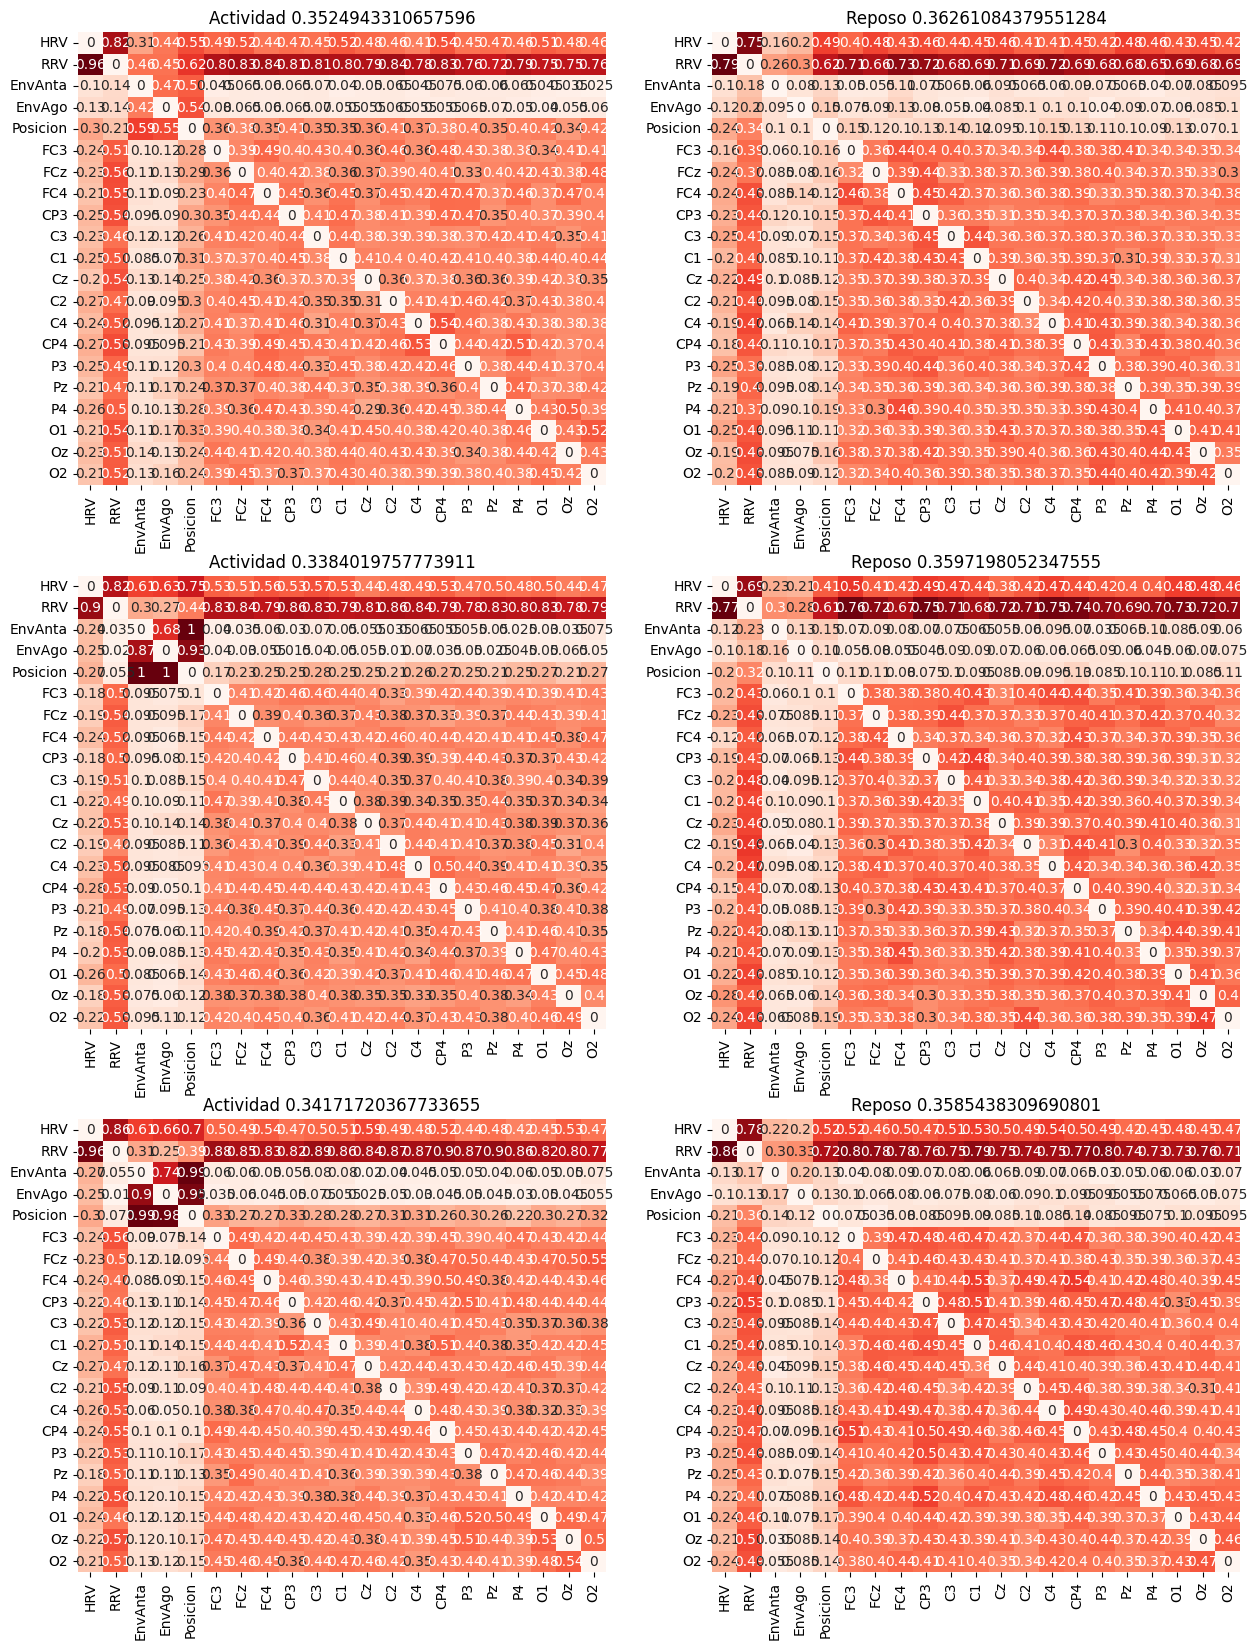

In [33]:
thresh = 0.


plt.figure(figsize=(15, 20))

plt.subplot(3, 2, 1)
#plt.imshow(act_10, cmap='Reds', interpolation='nearest')

sns.heatmap((act_10 > thresh).astype(int) * act_10, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names)
plt.title(f'Actividad {den_act_10}')

#plt.yticks(range(len(ch_names)), ch_names)
#plt.xticks(range(len(ch_names)), ch_names, rotation=90)

plt.subplot(3, 2, 2)
#plt.imshow(rep_10, cmap='Reds', interpolation='nearest')

sns.heatmap((rep_10 > thresh).astype(int) *  rep_10, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names)

plt.title(f'Reposo {den_rep_10}')
#plt.yticks(range(len(ch_names)), ch_names)
#plt.xticks(range(len(ch_names)), ch_names, rotation=90)


plt.subplot(3, 2, 3)
#plt.imshow(act_5 cmap='Reds', interpolation='nearest')
sns.heatmap((act_5 > thresh).astype(int) * act_5, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names)
plt.title(f'Actividad {den_act_5}')
#plt.yticks(range(len(ch_names)), ch_names)
#plt.xticks(range(len(ch_names)), ch_names, rotation=90)

plt.subplot(3, 2, 4)
#plt.imshow(rep_5, cmap='Reds', interpolation='nearest')
sns.heatmap((rep_5 > thresh).astype(int) * rep_5, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names)

plt.title(f'Reposo {den_rep_5}')
#plt.yticks(range(len(ch_names)), ch_names)
#plt.xticks(range(len(ch_names)), ch_names, rotation=90)

plt.subplot(3, 2, 5)
#plt.imshow(act_0, cmap='Reds', interpolation='nearest')
sns.heatmap((act_0 > thresh).astype(int) * act_0, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names)

plt.title(f'Actividad {den_act_0}')
#plt.yticks(range(len(ch_names)), ch_names)
#plt.xticks(range(len(ch_names)), ch_names, rotation=90)

plt.subplot(3, 2, 6)
#plt.imshow(rep_0, cmap='Reds', interpolation='nearest')
sns.heatmap((rep_0 > thresh).astype(int) * rep_0, cmap='Reds', annot=True, cbar=False, xticklabels=ch_names, yticklabels=ch_names)

plt.title(f'Reposo {den_rep_0}')
#plt.yticks(range(len(ch_names)), ch_names)
#plt.xticks(range(len(ch_names)), ch_names, rotation=90)
plt.show()

In [34]:
import networkx as nx

In [35]:
y, x, ro, deg, ch_names =ib.eloc_reader('../codigo/eloc16_bueno.txt')


new_x = np.array([x.min() - 0.021,     x.min() - 0.1,    x.max() + 0.1,  x.max() + 0.02, 0])
new_y = np.array([y.max() + 0.25,   y.max() + 0.25,     y.max() + 0.25, y.max() + 0.25, y.max() + 0.25])

x = np.concatenate((new_x, x))
y = np.concatenate((new_y, y))

In [36]:
def plot_network(mu, x, y, matriz_conectividad, title = None, subplot_position = 111):
    # Crear el grafo
    G = nx.DiGraph()  # Cambiar a DiGraph para flechas dirigidas

    # Agregar nodos al grafo con las coordenadas y nombres de los canales
    for i, name in enumerate(mu.columns.values):
        G.add_node(i, pos=(x[i], y[i]), label=name)

    # Agregar aristas al grafo basado en la matriz de conectividad
    for i in range(matriz_conectividad.shape[0]):
        for j in range(matriz_conectividad.shape[1]):
            if matriz_conectividad[i, j]:
                G.add_edge(i, j, weight=matriz_conectividad[i, j] * 3)

    # Función para obtener el mapa de colores de los nodos
    def get_color_map(G):
        color_map = []
        for node in G.nodes(data=True):
            label = node[1]['label']
            if 'CP' in label:
                color_map.append('#66c2a5')  # Verde suave
            elif 'FC' in label:
                color_map.append('#8da0cb')  # Azul suave
            elif 'C' in label:
                color_map.append('#fc8d62')  # Rojo suave
            elif 'P' in label:
                color_map.append('#e78ac3')  # Naranja suave
            elif 'O' in label:
                color_map.append('#a6d854')  # Verde claro
            else:
                color_map.append('#add8e6')  # Azul claro
        return color_map

    color_map = get_color_map(G)

    # Función para obtener los colores de las aristas
    def get_edge_colors(G, color_map):
        edge_colors = []
        for edge in G.edges():
            edge_colors.append(color_map[edge[0]])
        return edge_colors

    edge_colors = get_edge_colors(G, color_map)

    # Obtener los pesos de las aristas para ajustar el grosor de las líneas
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

    # Tamaño de los nodos basado en el grado
    node_size = [5 * G.degree(n) for n in G.nodes()]

    # Dibujar el grafo
    plt.subplot(subplot_position)
    pos = nx.get_node_attributes(G, 'pos')
    nx.draw(G, pos, labels=nx.get_node_attributes(G, 'label'), arrowsize=10, node_color=color_map, node_size=node_size, font_size=8, font_weight='bold', edge_color=edge_colors, width=edge_weights)
    if title is not None:
        plt.title(title)
        

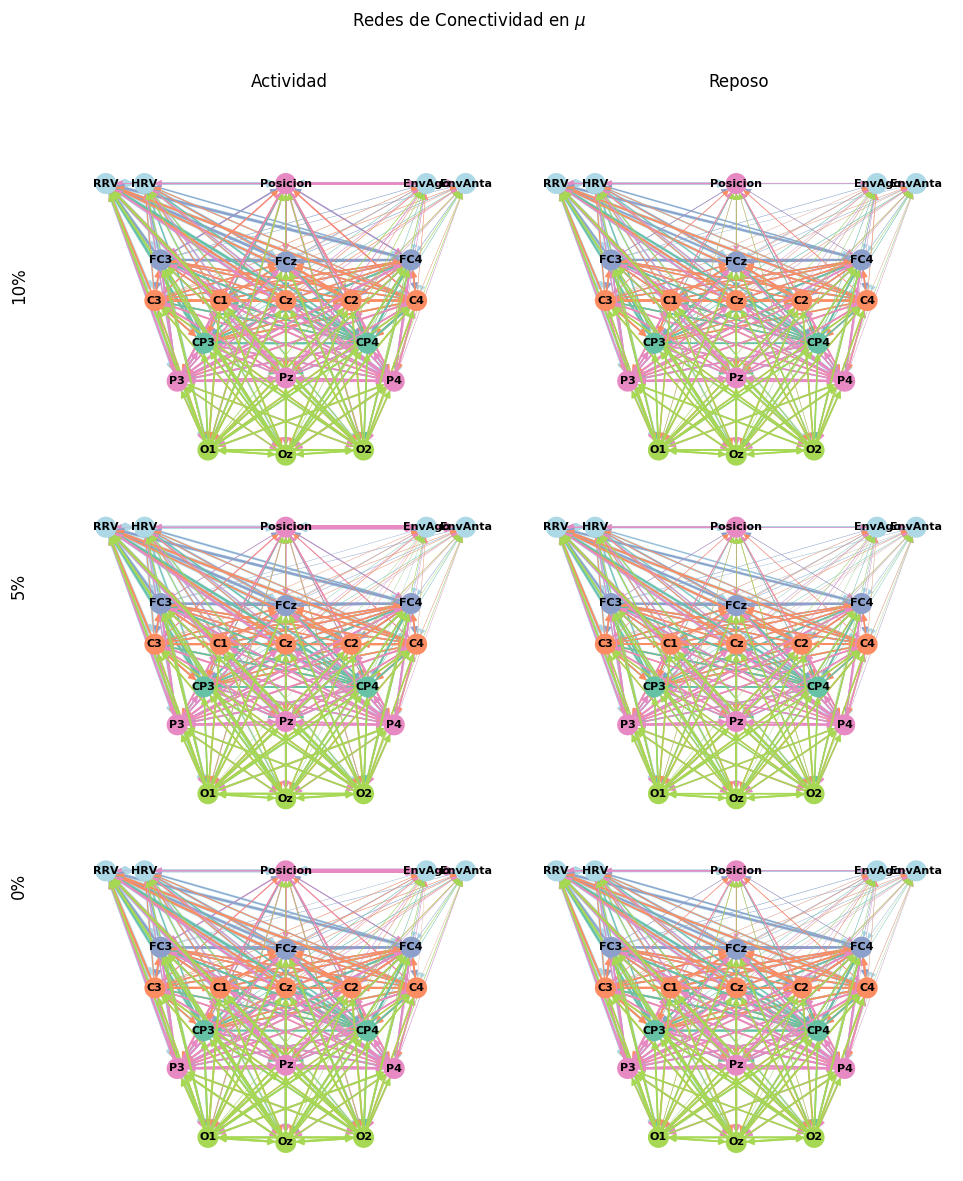

In [37]:
h = 10
w = int(h * 1.2)
plt.figure(figsize=(h, w))
plt.suptitle(fr'Redes de Conectividad en $\{band}$')

plt.text(0.32, 0.92, 'Actividad', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=12)
plt.text(0.77, 0.92, 'Reposo', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=12)

plt.text(0.05, 0.75, '10%', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=12, rotation='vertical')
plt.text(0.05, 0.5, '5%', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=12, rotation='vertical')
plt.text(0.05, 0.25, '0%', ha='center', va='center', transform=plt.gcf().transFigure, fontsize=12, rotation='vertical')
plt.axis('off')

#plot_network(mu, x, y, act_10, subplot_position= 321)
#plot_network(mu, x, y, rep_10, subplot_position=322)

#plot_network(mu, x, y, act_5, subplot_position=323)
#plot_network(mu, x, y, rep_5, subplot_position= 324)

#plot_network(mu, x, y, act_0, subplot_position=325)
#plot_network(mu, x, y, rep_0, subplot_position=326)

plot_network(mu, x, y, (act_10 > thresh).astype(int) * act_10, subplot_position= 321)
plot_network(mu, x, y, (rep_10 > thresh).astype(int) * rep_10, subplot_position=322)

plot_network(mu, x, y, (act_5 > thresh).astype(int) * act_5, subplot_position=323)
plot_network(mu, x, y, (rep_5 > thresh).astype(int) * rep_5, subplot_position= 324)

plot_network(mu, x, y, (act_0 > thresh).astype(int) * act_0, subplot_position=325)
plot_network(mu, x, y, (rep_0 > thresh).astype(int) * rep_0, subplot_position=326)


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()